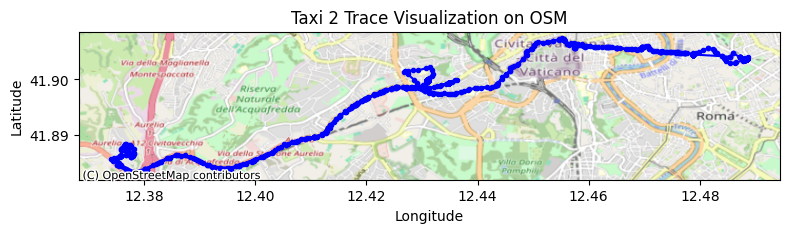

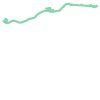

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import LineString

def plot_trace(file_path):
    # Read the CSV file with the new format (comma-separated with ID,Timestamp,Latitude,Longitude)
    df = pd.read_csv(file_path)
    
    # Create a plot
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Extract x (longitude) and y (latitude) coordinates
    x = df['Longitude'].values
    y = df['Latitude'].values
    
    # Plot the points and connect them with lines
    ax.plot(x, y, marker='o', linestyle='-', color='blue', markersize=3)
    
    # Create a LineString for the title info
    line = LineString(zip(x, y))
    
    # Add basemap
    ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.OpenStreetMap.Mapnik)
    
    # Adjust view to be top-down
    ax.set_aspect('equal')
    
    # Get taxi ID from the first entry
    taxi_id = df['ID'].iloc[0]
    
    ax.set_title(f'Taxi {taxi_id} Trace Visualization on OSM')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.tight_layout()
    plt.show()
    
    return line

# Example usage
# Adjust the path to match your file naming convention
plot_trace('taxi-2-rit-1.csv')